In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
plt.style.use('ggplot')

df = pd.read_csv('apps.csv')

In [3]:
df['Min Years Experience'] = df['YOE'].str[:1]
df.rename(columns={'First Contact Date':'Application Date'},inplace=True)
df['Application Date'] = pd.to_datetime(df['Application Date'])
df['Response Date'] = pd.to_datetime(df['Response Date'])
df['Response Time'] = (df['Response Date']-df['Application Date']).dt.days

df['Skills'].fillna('Undefined',inplace=True)
df['Nice to have'].fillna('Undefined',inplace=True)


responded = df[df['Response']=='Yes']

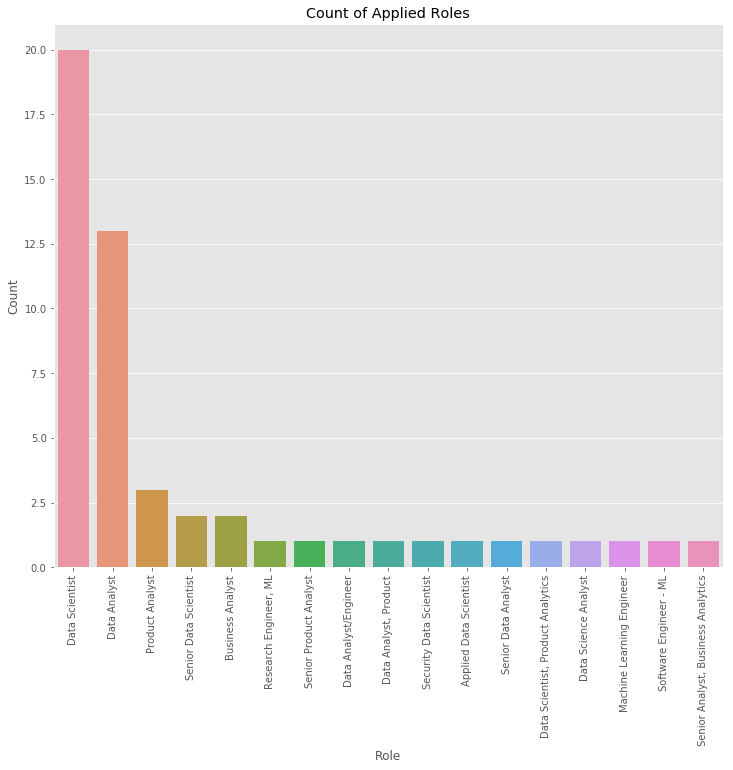

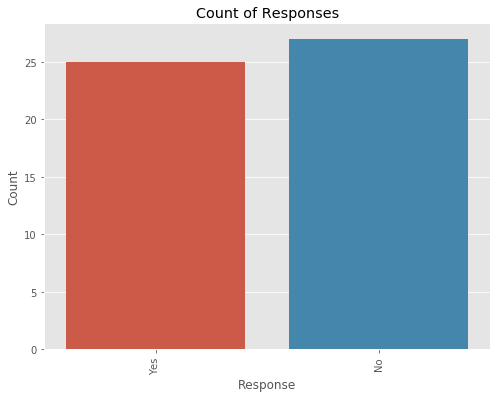

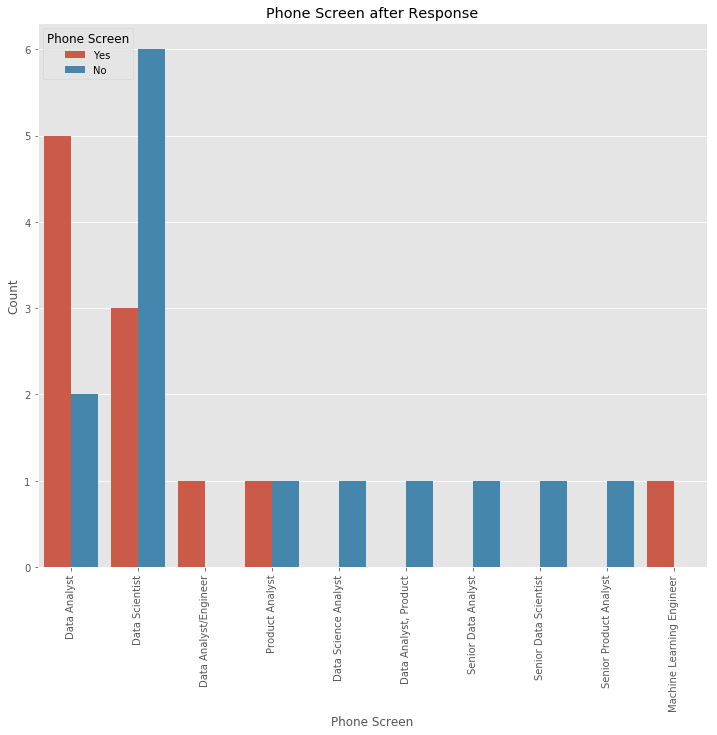

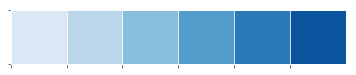

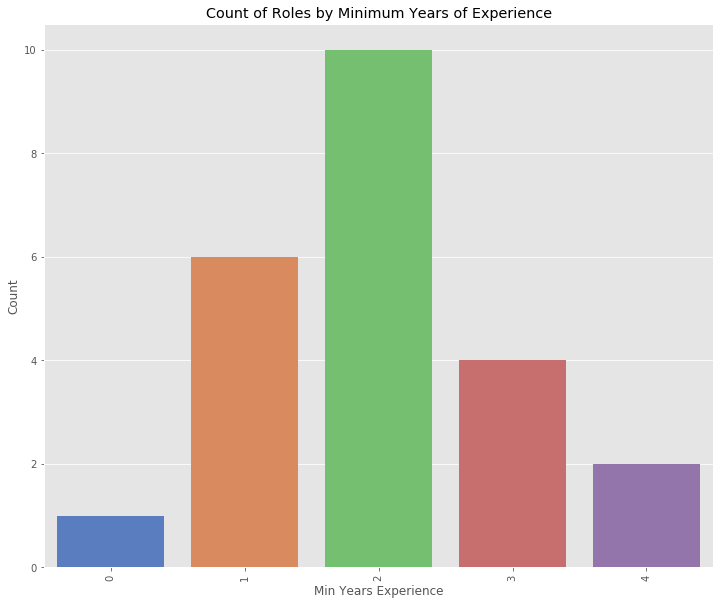

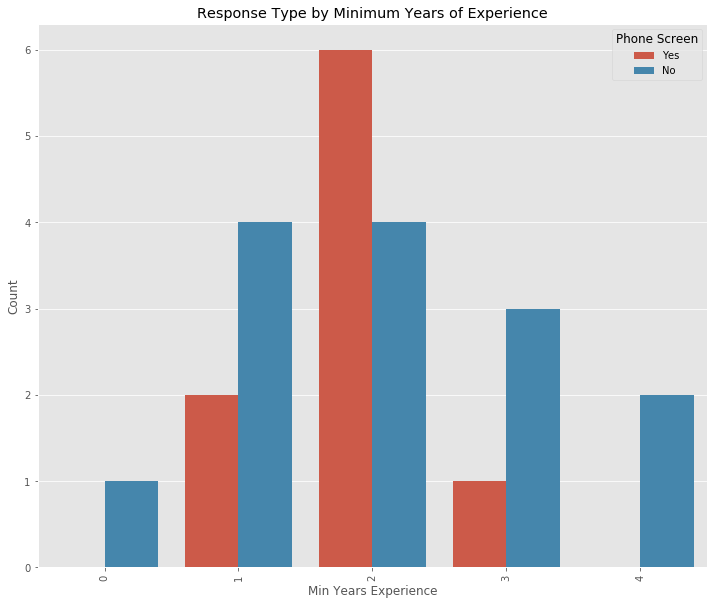

In [8]:
#Histogram of applied roles
figure = plt.figure(figsize=(12,10))
sns.countplot(data=df,x='Role',order=df['Role'].value_counts().index)
plt.title('Count of Applied Roles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

#Histogram of responses
figure = plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Response')
plt.title('Count of Responses')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

#Histogram of Response Type
figure = plt.figure(figsize=(12,10))
sns.countplot(data=responded,x='Role',hue='Phone Screen')
plt.title('Phone Screen after Response')
plt.xlabel('Phone Screen')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Histogram of YOE
figure = plt.figure(figsize=(12,10))
sns.countplot(data=responded,
              x='Min Years Experience',
              order=df['Min Years Experience'].value_counts().index.sort_values(),
             palette=sns.color_palette("muted"))
plt.title('Count of Roles by Minimum Years of Experience')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

#Histogram of Response Type by YOE
figure = plt.figure(figsize=(12,10))
sns.countplot(data=responded,
              x='Min Years Experience',
              hue='Phone Screen',
              order=df['Min Years Experience'].value_counts().index.sort_values())
plt.title('Response Type by Minimum Years of Experience')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()



defaultdict(<class 'int'>, {'Python': 20, 'R': 6, 'SQL': 11, 'Java': 1, 'C': 1, 'Undefined': 3, 'Julia': 1, 'Tableau': 1}) defaultdict(<class 'int'>, {'Undefined': 20, 'Python': 1, 'R': 2, 'Spark': 1, 'SQL': 2})


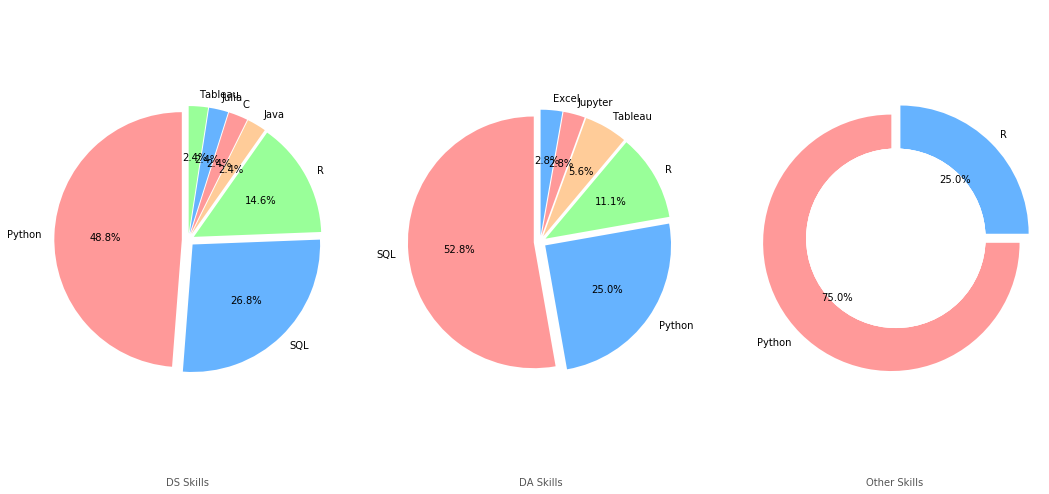

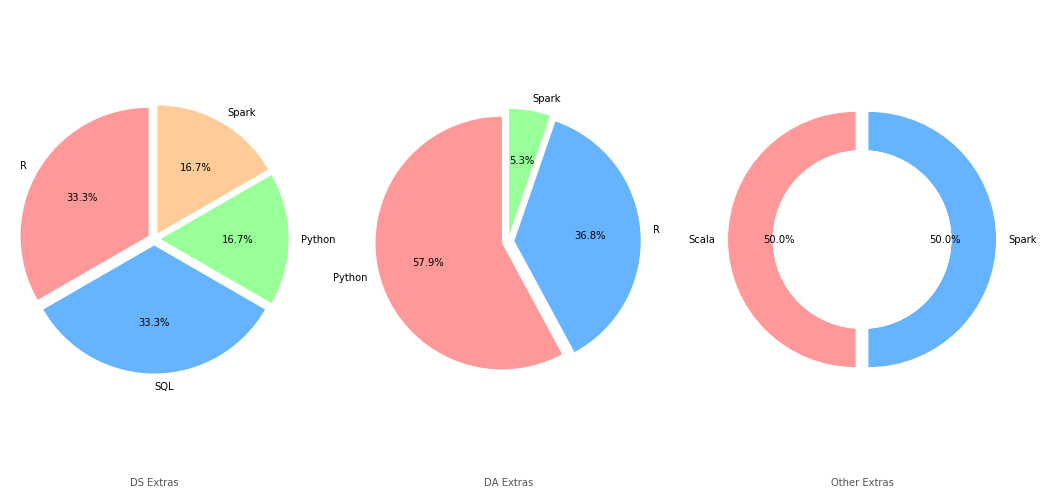

In [94]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

ds_skills = defaultdict(int)
ds_extras = defaultdict(int)
da_skills = defaultdict(int)
da_extras = defaultdict(int)
other_skills = defaultdict(int)
other_extras = defaultdict(int)

for index,row in df.iterrows():
    skills = [x.strip(' ') for x in row['Skills'].split(',')]
    extras = [x.strip(' ') for x in row['Nice to have'].split(',')]
    if 'scientist' in row['Role'].lower():
        for skill in skills:
            ds_skills[skill] += 1
        for extra in extras:
            ds_extras[extra] += 1
    elif 'analyst' in row['Role'].lower():
        for skill in skills:
            da_skills[skill] += 1
        for extra in extras:
            da_extras[extra] += 1
    else:
        for skill in skills:
            other_skills[skill] += 1
        for extra in extras:
            other_extras[extra] += 1

skills_graphs = [ds_skills,da_skills,other_skills]
extras_graphs = [ds_extras,da_extras,other_extras]
skills_labels = ['DS Skills','DA Skills','Other Skills']
extras_labels = ['DS Extras','DA Extras','Other Extras']

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((16,8))
for ind,role in enumerate(skills_graphs):
    role.pop('Undefined',None)
    labels = sorted(role,reverse=True,key=role.get)
    sizes = sorted(role.values(),reverse=True)

    ax[ind].pie(sizes,
            colors=colors,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            explode=[.05]*len(sizes)
           )
    ax[ind].set_xlabel(skills_labels[ind], fontsize=10)

    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax[ind].axis('equal')  
plt.show()    

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((16,8))
for ind,role in enumerate(extras_graphs):
    role.pop('Undefined',None)
    labels = sorted(role,reverse=True,key=role.get)
    sizes = sorted(role.values(),reverse=True)

    ax[ind].pie(sizes,
            colors=colors,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            explode=[.05]*len(sizes)
           )
    ax[ind].set_xlabel(extras_labels[ind], fontsize=10)

    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax[ind].axis('equal')  
plt.show() 

         Company                       Role Company Initiated  \
0       AppLovin               Data Analyst                No   
3      People.ai               Data Analyst                No   
7           Brex             Data Scientist                No   
9          Scoot               Data Analyst                No   
10       Liftoff             Data Scientist                No   
12       Plastiq               Data Analyst                No   
13          Lime             Data Scientist                No   
14     StitchFix             Data Scientist                No   
15         Quora             Data Scientist                No   
16        Airbnb             Data Scientist                No   
18        Cruise      Data Analyst/Engineer               Yes   
19          Lyft             Data Scientist                No   
22       Mozilla             Data Scientist                No   
25         Chime               Data Analyst                No   
26     Thumbtack         

/Users/jasonwang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


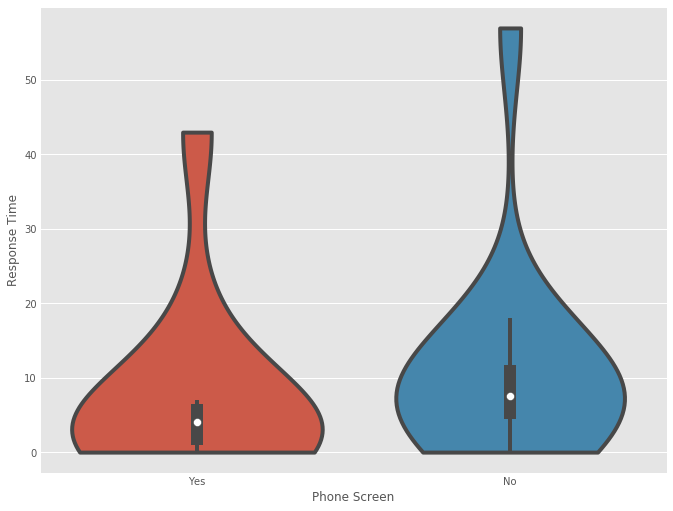

In [42]:
print(responded)
#Time to respond based on response type
fig = plt.figure(figsize=(10,8))
sns.violinplot(data=responded,x='Phone Screen',y='Response Time',cut=0)
plt.show()

In [43]:
#General Stats

print('Applications that received a response: {:.2%}'.
     format(len(df[df['Response']=='Yes'])/len(df)))

print('Applications that received a phone screen: {:.2%}'.
     format(len(df[df['Phone Screen']=='Yes'])/len(df)))

print('Responses that were for a phone screen: {:.2%}'.
     format(len(df[df['Phone Screen']=='Yes'])/len(df[df['Response']=='Yes'])))

print('Phone Screens that led to onsite: {:.2%}'.
     format(len(df[(df['Onsite']=='Yes')|(df['Onsite']=='N/A')])
            /len(df[df['Phone Screen']=='Yes'])))

print('Onsites that led to offer: {:.2%}'.
     format(len(df[df['Offer']=='Yes'])
            /len(df[df['Onsite']=='Yes'])))

Applications that received a response: 48.08%
Applications that received a phone screen: 21.15%
Responses that were for a phone screen: 44.00%
Phone Screens that led to onsite: 54.55%
Onsites that led to offer: 50.00%
